# Linear Regression
## Rachel Tekchandani
---
Linear Regression is a supervised learning algorithm that is applied to real valued target functions in order to predict a range of possible outputs for a given input.

Unlike the two previous algorithms which involved classifcation, this is a prediction algorithm.

The algorithm assumes that the targets are close to some linear combination of the features of the input data.

Unlike other machine learning algorithms, linear regression has a closed-form solution.

Closed form means that there is a equation that solves for the linear regression.

---
In this notebook, we will use the dataset called Motor Trend Car Road Tests 

![motortrend](motortrend.jpg)

The data comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

We will attempt to use this data to predict **MPG from HP** (Miles Per Gallon, Horsepower) with the hypothesis that the higher the HP, the lower the MPG.

In [1]:
using RDatasets
mtdata = dataset("datasets","mtcars")               # The dataset function comes from the package RDatasets and we use this function to bring in the mt data and save it to the variable mtdata
head(mtdata,8)                                      # Print the top 8 rows 

,Model,MPG,Cyl,Disp,HP,DRat,WT,QSec,VS
,String,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Int64
1,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0
2,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0
3,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1
4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1
5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0
6,Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1
7,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0
8,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1


In [2]:
hp = mtdata.HP

32-element Array{Int64,1}:
 110
 110
  93
 110
 175
 105
 245
  62
  95
 123
 123
 180
 180
   ⋮
  97
 150
 150
 245
 175
  66
  91
 113
 264
 175
 335
 109

In [3]:
mpg = mtdata.MPG

32-element Array{Float64,1}:
 21.0
 21.0
 22.8
 21.4
 18.7
 18.1
 14.3
 24.4
 22.8
 19.2
 17.8
 16.4
 17.3
  ⋮
 21.5
 15.5
 15.2
 13.3
 19.2
 27.3
 26.0
 30.4
 15.8
 19.7
 15.0
 21.4

The goal of linear regression is to solve a system of equations

$$ y^1 = w_1x^1 + w_2 $$
$$ y^2 = w_1x^2 + w_2 $$
$$ y^3 = w_1x^3 + w_2 $$

The equations can be converted to Matrix notation

$$ \begin{bmatrix} x^1 & 1 \\ x^2 & 1 \\ x^3 & 1 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} y^1 \\ y^2 \\ y^3 \end{bmatrix} $$
$$ X \qquad \quad w \quad \qquad   y  $$

We want to solve for $w$:

$$ Xw = y $$

There is no exact solution and so we can find $\hat{w}$ which is an approximation

$$ X^TX\hat{w} = X^Ty => \hat{w} = (X^T X)^{-1} X^T y $$

after solving...

$$ y \approx \hat{w}_1 x^* + \hat{w}_2 $$

In [4]:
# import Plots and Random
using Plots
using Random

In [5]:
data = [x for x in zip(hp,mpg)]

32-element Array{Tuple{Int64,Float64},1}:
 (110, 21.0)
 (110, 21.0)
 (93, 22.8)
 (110, 21.4)
 (175, 18.7)
 (105, 18.1)
 (245, 14.3)
 (62, 24.4)
 (95, 22.8)
 (123, 19.2)
 (123, 17.8)
 (180, 16.4)
 (180, 17.3)
 ⋮
 (97, 21.5)
 (150, 15.5)
 (150, 15.2)
 (245, 13.3)
 (175, 19.2)
 (66, 27.3)
 (91, 26.0)
 (113, 30.4)
 (264, 15.8)
 (175, 19.7)
 (335, 15.0)
 (109, 21.4)

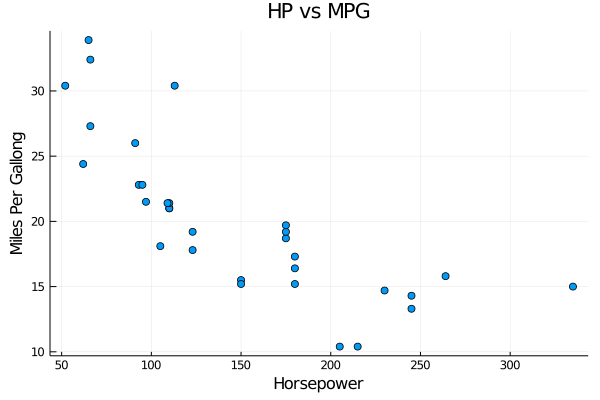

In [25]:
# plot to see if a linear trend can be seen

scatter([p for p in data],
        xaxis = "Horsepower",
        yaxis = "Miles Per Gallong",
        title = "HP vs MPG",
        legend = false)

In [26]:
# create a testing and training set split

# Randomly select data poitns from the full data set to make training set

train_data = randsubseq(data, .7)              # training data inputs a value of how much of the dataset should be used for training.  
                                               # a 70/30 split is commonly used in similar problems and is used here

25-element Array{Tuple{Int64,Float64},1}:
 (110, 21.0)
 (110, 21.0)
 (110, 21.4)
 (175, 18.7)
 (245, 14.3)
 (95, 22.8)
 (123, 19.2)
 (123, 17.8)
 (180, 17.3)
 (180, 15.2)
 (215, 10.4)
 (230, 14.7)
 (66, 32.4)
 (52, 30.4)
 (65, 33.9)
 (97, 21.5)
 (150, 15.2)
 (245, 13.3)
 (66, 27.3)
 (91, 26.0)
 (113, 30.4)
 (264, 15.8)
 (175, 19.7)
 (335, 15.0)
 (109, 21.4)

In [27]:
test_data = [x for x in data if !(x in train_data) ]   # the test data are the data points not used during training

7-element Array{Tuple{Int64,Float64},1}:
 (93, 22.8)
 (105, 18.1)
 (62, 24.4)
 (180, 16.4)
 (205, 10.4)
 (150, 15.5)
 (175, 19.2)

In [28]:
## Test that test and train data adds to the whole data
length(train_data)+length(test_data)==length(data)

true

In [29]:
train_x = [x[1] for x in train_data]

25-element Array{Int64,1}:
 110
 110
 110
 175
 245
  95
 123
 123
 180
 180
 215
 230
  66
  52
  65
  97
 150
 245
  66
  91
 113
 264
 175
 335
 109

In [30]:
train_y = [x[2] for x in train_data]

25-element Array{Float64,1}:
 21.0
 21.0
 21.4
 18.7
 14.3
 22.8
 19.2
 17.8
 17.3
 15.2
 10.4
 14.7
 32.4
 30.4
 33.9
 21.5
 15.2
 13.3
 27.3
 26.0
 30.4
 15.8
 19.7
 15.0
 21.4

In [31]:
# first make the matrix X

X = ones(length(train_x), 2)
X[:,1] = train_x
X

25×2 Array{Float64,2}:
 110.0  1.0
 110.0  1.0
 110.0  1.0
 175.0  1.0
 245.0  1.0
  95.0  1.0
 123.0  1.0
 123.0  1.0
 180.0  1.0
 180.0  1.0
 215.0  1.0
 230.0  1.0
  66.0  1.0
  52.0  1.0
  65.0  1.0
  97.0  1.0
 150.0  1.0
 245.0  1.0
  66.0  1.0
  91.0  1.0
 113.0  1.0
 264.0  1.0
 175.0  1.0
 335.0  1.0
 109.0  1.0

In [32]:
# next solve for ŵ
ŵ = (X'*X)\(X'*train_y)

# Note: if Ax = B, then x = A\b solves the system

2-element Array{Float64,1}:
 -0.06863366161551704
 30.86767023424742

In [33]:
# define the regression line, i.e.e the prediction function

prediction(x) = ŵ[1]*x + ŵ[2]

prediction (generic function with 1 method)

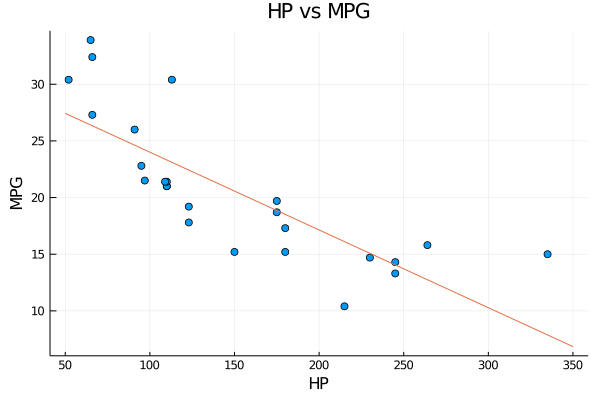

In [34]:
#plot against the training data
scatter([p for p in train_data],
        xaxis = "HP",
        yaxis = "MPG",
        title = "HP vs MPG",
        legend = false)
plot!([(x, prediction(x)) for x = 50:350])

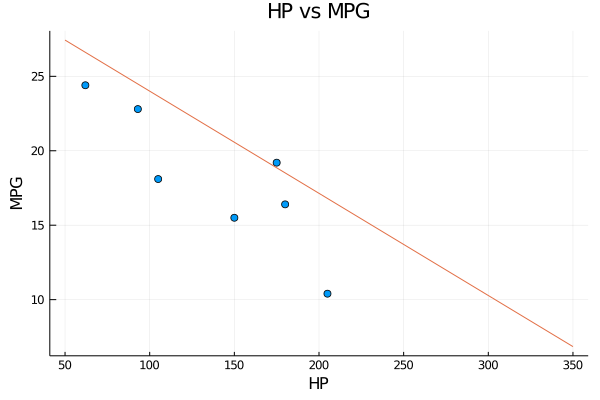

In [35]:
#plot against the test data
scatter([p for p in test_data],
        xaxis = "HP",
        yaxis = "MPG",
        title = "HP vs MPG",
        legend = false)
plot!([(x, prediction(x)) for x = 50:350])

In [36]:
# to test the fit, calculate the error
error_array = [abs(prediction(x[1])-x[2]) for x in train_data] 

25-element Array{Float64,1}:
 2.317967456540547
 2.317967456540547
 1.9179674565405485
 0.15677945153193917
 0.24757686155425418
 1.5474723807733
 3.2257298555388267
 4.625729855538825
 1.2136111434543544
 3.313611143454356
 5.711432986911257
 0.38192806267850266
 6.062151432376702
 3.1012801697594625
 7.493517770761187
 2.710205057542268
 5.372620991919863
 0.7524231384457458
 0.9621514323767038
 1.3779929727646305
 7.287933528306006
 3.05161643224908
 0.8432205484680608
 7.1246064069507895
 1.986601118156063

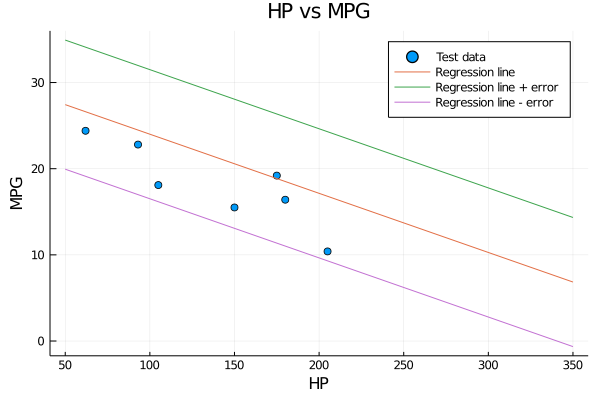

In [38]:
#plot against the training data
scatter([p for p in test_data],
        xaxis = "HP",
        yaxis = "MPG",
        title = "HP vs MPG",
        label = "Test data")

plot!([(x, prediction(x)) for x = 50:350], label = "Regression line")

plot!([(x, prediction(x) + maximum(error_array)) for x = 50:350], label = "Regression line + error")
plot!([(x, prediction(x) - maximum(error_array)) for x = 50:350], label = "Regression line - error")

In [39]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array))

prediction_interval (generic function with 1 method)

In [40]:
prediction_interval(200)

(9.647420140382827, 24.6344556819052)

The output seen above is the range for MPG you can expect for a car with a horsepower of 200.